## Transfer Learning Inception V3 using Keras

In [1]:
!git clone https://github.com/CodeWizard812/Cotton-Disease-Detection.git

Cloning into 'Cotton-Disease-Detection'...
remote: Enumerating objects: 2316, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 2316 (delta 0), reused 3 (delta 0), pack-reused 2313
Receiving objects: 100% (2316/2316), 147.38 MiB | 13.76 MiB/s, done.
Updating files: 100% (2312/2312), done.


Please download the dataset from the below url

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.resnet152V2 import ResNet152V2
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/Cotton-Disease-Detection/train'
valid_path = '/content/Cotton-Disease-Detection/val'


In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
import tensorflow
resnet152V2 =tensorflow.keras.applications.ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




234545216/234545216 [==============================] - 12s 0us/step


In [6]:
# don't train existing weights
for layer in resnet152V2.layers:
    layer.trainable = False

In [7]:
  # useful for getting number of output classes
folders = glob('/content/Cotton-Disease-Detection/train/*')

In [8]:
# our layers - you can add more if you want
x = Flatten()(resnet152V2.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet152V2.input, outputs=prediction)

In [10]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                                                                                              

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/Cotton-Disease-Detection/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [14]:
test_set = test_datagen.flow_from_directory('/content/Cotton-Disease-Detection/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 324 images belonging to 4 classes.


In [15]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-15-2d02736eff38>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
61/61 [==============================] - 53s 644ms/step - loss: 1.0347 - accuracy: 0.8339 - val_loss: 0.5672 - val_accuracy: 0.9352
Epoch 2/20
61/61 [==============================] - 35s 566ms/step - loss: 0.4756 - accuracy: 0.9298 - val_loss: 0.4883 - val_accuracy: 0.9198
Epoch 3/20
61/61 [==============================] - 35s 569ms/step - loss: 0.3876 - accuracy: 0.9421 - val_loss: 0.7211 - val_accuracy: 0.9074
Epoch 4/20
61/61 [==============================] - 34s 561ms/step - loss: 0.3040 - accuracy: 0.9518 - val_loss: 0.7032 - val_accuracy: 0.9228
Epoch 5/20
61/61 [==============================] - 36s 588ms/step - loss: 0.3678 - accuracy: 0.9503 - val_loss: 0.8502 - val_accuracy: 0.9228
Epoch 6/20
61/61 [==============================] - 35s 571ms/step - loss: 0.3974 - accuracy: 0.9534 - val_loss: 0.8689 - val_accuracy: 0.9444
Epoch 7/20
61/61 [==============================] - 34s 561ms/step - loss: 0.5356 - accuracy: 0.9405 - val_loss: 0.4872 - val_accuracy: 0.9475

In [16]:
import matplotlib.pyplot as plt

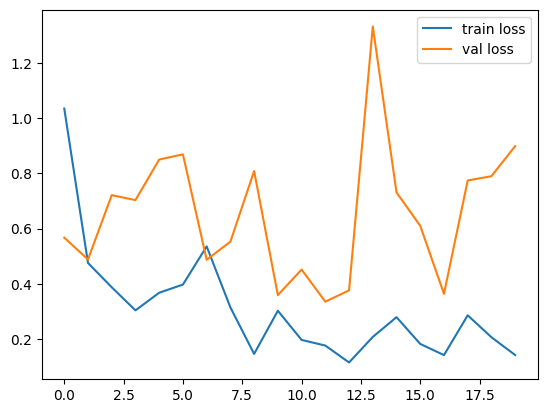

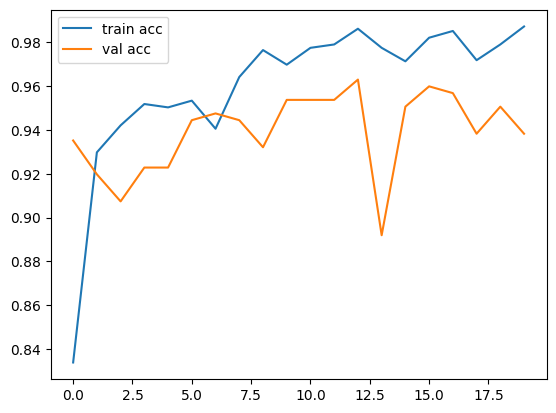

<Figure size 640x480 with 0 Axes>

In [18]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [30]:
from google.colab import drive
drive.mount('/content/drive')

model.save("/content/drive/MyDrive/model_resnet152V2.h5")

Mounted at /content/drive
